Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.


- Definition – Deep Learning is a subset of Machine Learning that uses multi-layered neural networks (often called deep neural networks) to automatically learn hierarchical representations of data for tasks like image recognition, NLP, and speech processing.

- Evolution – It evolved from early neural network research (perceptron in 1958, backpropagation in the 1980s) and gained traction in the 2010s with improvements in computational power (GPUs), availability of big data, and better architectures (CNNs, RNNs, Transformers).

- Representation Learning – Unlike traditional ML, which often requires manual feature engineering, deep learning models automatically learn feature representations directly from raw data.

- Performance – Deep learning models generally outperform traditional ML methods on unstructured data (images, text, audio) due to their ability to model complex, non-linear patterns.

- Computation & Data Needs – Deep learning requires much larger datasets and higher computational resources than traditional ML, but scales better as data size increases.




Question 2: Explain the basic architecture and functioning of a Perceptron. What are its
limitations?


- Architecture – A perceptron has input nodes (features), weighted connections, a summation function, and an activation function that outputs 0 or 1.

- Functioning – It multiplies inputs by weights, sums them, adds a bias, and applies an activation function (e.g., step function) to decide the output.

- Limitations – Can only solve linearly separable problems (fails on XOR), has limited learning capacity, and cannot model complex non-linear relationships without multiple layers.

Question 3: Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.

- Activation functions introduce non-linearity in neural networks, allowing them to learn complex patterns beyond simple linear relationships.

- Sigmoid squashes input to a range between 0 and 1, good for probabilities but suffers from vanishing gradients for very high or low inputs.

- ReLU outputs 0 for negative inputs and the same value for positive inputs, making it computationally efficient and reducing vanishing gradient issues, but can cause "dead neurons."

- Tanh squashes input between -1 and 1, centers data around zero, performs better than Sigmoid in practice, but still faces vanishing gradient problems for extreme values.

Question 4: What is the difference between Loss function and Cost function in neural
networks? Provide examples.

A loss function measures how wrong the model’s prediction is for a single training example.
Example: Mean Squared Error (MSE) for one data point, Cross-Entropy Loss for one prediction.

A cost function is basically the average of the loss function over the entire training dataset (or a batch).
Example: The overall MSE of the whole dataset, or the total Cross-Entropy Loss over all samples in a batch.

In simple terms: loss = one sample’s error, cost = average error of all samples.

Question 5: What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.

| **Optimizer**       | **Role / Working**                                                                 | **Pros**                                                                 | **Cons**                                                                  |
|---------------------|------------------------------------------------------------------------------------|---------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Gradient Descent**| Updates weights by moving in the direction of negative gradient of loss function.  | Simple and easy to understand, works well for convex problems.            | Can be slow, sensitive to learning rate, may get stuck in local minima.   |
| **Adam**            | Combines Momentum + RMSprop, adapts learning rate for each parameter individually.| Fast convergence, works well in practice, handles sparse gradients.       | Can sometimes overfit, uses more memory due to extra parameters.          |
| **RMSprop**         | Adapts learning rate using moving average of squared gradients.                    | Good for non-stationary problems, converges faster than vanilla GD.       | Requires tuning decay rate, may still oscillate near optimum.             |


Question 6: Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.

In [1]:
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])

lr = 0.1
epochs = 20

weights = np.zeros(X.shape[1])
bias = 0.0

def step_function(z):
    return 1 if z >= 0 else 0

for epoch in range(epochs):
    total_error = 0
    for xi, target in zip(X, y):
        z = np.dot(xi, weights) + bias
        y_pred = step_function(z)
        error = target - y_pred

        weights += lr * error * xi
        bias += lr * error
        total_error += abs(error)
    print(f"Epoch {epoch+1}: Total Error = {total_error}")

print("\nFinal Weights:", weights)
print("Final Bias:", bias)

print("\nTesting AND Gate:")
for xi in X:
    z = np.dot(xi, weights) + bias
    print(f"Input: {xi}, Output: {step_function(z)}")


Epoch 1: Total Error = 2
Epoch 2: Total Error = 3
Epoch 3: Total Error = 3
Epoch 4: Total Error = 0
Epoch 5: Total Error = 0
Epoch 6: Total Error = 0
Epoch 7: Total Error = 0
Epoch 8: Total Error = 0
Epoch 9: Total Error = 0
Epoch 10: Total Error = 0
Epoch 11: Total Error = 0
Epoch 12: Total Error = 0
Epoch 13: Total Error = 0
Epoch 14: Total Error = 0
Epoch 15: Total Error = 0
Epoch 16: Total Error = 0
Epoch 17: Total Error = 0
Epoch 18: Total Error = 0
Epoch 19: Total Error = 0
Epoch 20: Total Error = 0

Final Weights: [0.2 0.1]
Final Bias: -0.20000000000000004

Testing AND Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.


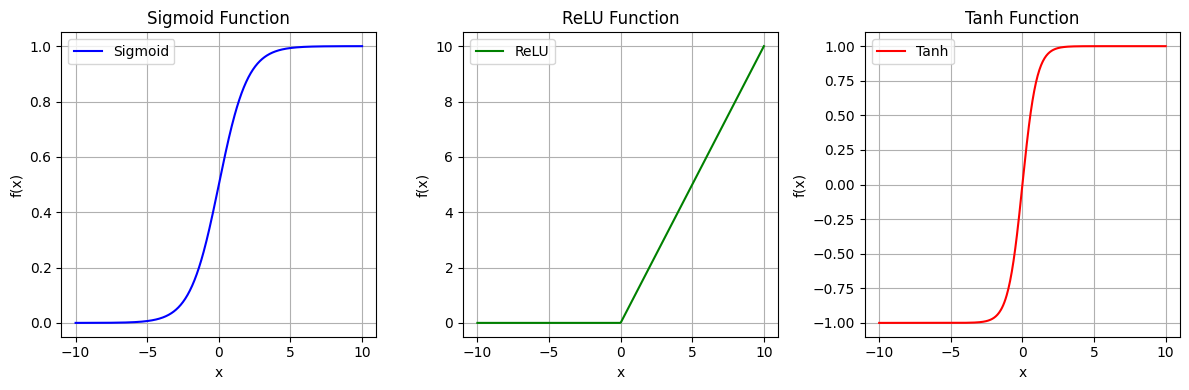

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 500)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid, label="Sigmoid", color='blue')
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, relu, label="ReLU", color='green')
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, tanh, label="Tanh", color='red')
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Question 8: Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

train_acc = history.history['accuracy'][-1]
print(f"\nFinal Training Accuracy: {train_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8734 - loss: 0.4326
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9671 - loss: 0.1083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9782 - loss: 0.0690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9836 - loss: 0.0506
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0401

Final Training Accuracy: 0.9868


Question 9: Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7623 - loss: 0.6874 - val_accuracy: 0.8499 - val_loss: 0.4271
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8627 - loss: 0.3833 - val_accuracy: 0.8327 - val_loss: 0.4498
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8741 - loss: 0.3436 - val_accuracy: 0.8670 - val_loss: 0.3739
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8799 - loss: 0.3225 - val_accuracy: 0.8644 - val_loss: 0.3838
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8905 - loss: 0.2986 - val_accuracy: 0.8567 - val_loss: 0.3907
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8971 - loss: 0.2765 - val_accuracy: 0.8722 - val_loss: 0.3598
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4

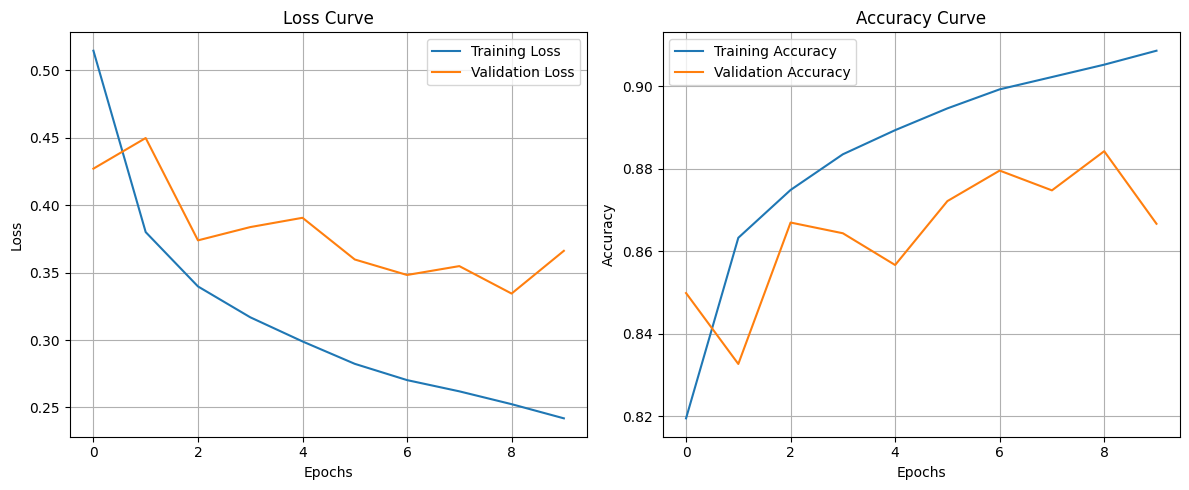

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Question 10: You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?
● How would you train and evaluate the model, considering class imbalance?
● Which optimizer would be suitable, and how would you prevent overfitting?

Model Design – I would use a multilayer neural network (MLP) rather than a single-layer perceptron because the data is structured but complex. The input layer would take all numeric/categorical features (after encoding), 2–3 hidden layers with 64–128 neurons each would capture non-linear relationships, and the output layer would have 1 neuron with sigmoid activation for binary classification (fraud vs. legitimate).

Activation & Loss Functions – ReLU would be used in hidden layers because it speeds up training and handles non-linear patterns well. The sigmoid function in the output layer converts predictions to probabilities between 0 and 1. For the loss function, binary cross-entropy is ideal since this is a binary classification problem and it penalizes misclassifications appropriately.

Training & Evaluation Considering Class Imbalance – Because fraudulent transactions are rare, I would:

Use class weighting or oversampling techniques like SMOTE to balance the classes.

Monitor metrics beyond accuracy, like precision, recall, F1-score, and AUC, because accuracy alone can be misleading in imbalanced datasets.

Possibly use stratified splitting to maintain class distribution in training and validation sets.

Optimizer & Overfitting Prevention – Adam optimizer is suitable for faster convergence and adaptive learning rates. To prevent overfitting:

Apply dropout layers in hidden layers.

Use L2 regularization on weights.

Implement early stopping based on validation loss or F1-score.

Workflow Summary – Preprocess the structured data (normalize numeric features, encode categorical ones), feed it into an MLP with ReLU hidden layers and sigmoid output, handle class imbalance during training, monitor precision/recall, and apply dropout/regularization to prevent overfitting. Evaluate the model on a held-out test set using AUC and F1-score to ensure reliable fraud detection.